In [1]:
#dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
#file path
csv_path = "../Resources/crimedata-33556-5yr.csv"
crime_data_df = pd.read_csv(csv_path)
crime_data_df.head(10)

,OBJECTID,Case Number,Crime Type,Crime Type Extension,Reported Date,Address,zip
0,854798,2016-1126,BATTERY,BATTERY-SIMPLE,1/1/2016,17900 BLOCK CRAWLEY RD,33556
1,855540,2016-7193,THEFT,THEFT MOTOR VEHICLE PARTS,1/4/2016,11900 BLOCK TARPON SPRINGS RD,33556
2,855959,2016-005259,TRAFFIC,Property Damage,1/6/2016,WAYNE RD / SIMMS RD,33556
3,856471,2016-17773,MISCHIEF,CRIMINAL MISCHIEF MISDEMEANOR,1/8/2016,15700 BLOCK BEREA DR,33556
4,856776,2016-21081,TRAFFIC,Non Incapacitating Injury,1/9/2016,GUNN HW / LUTZ LAKE FERN RD,33556
5,856777,2016-020910,TRAFFIC,Non Incapacitating Injury,1/9/2016,BOY SCOUT RD / CRAWLEY RD,33556
6,856910,2016-23327,TRAFFIC,Property Damage,1/10/2016,SOUTH MOBLEY RD / GUNN HW,33556
7,857276,2016-24062,BURGLARY,BURGLARY BUSINESS/ FORCED,1/11/2016,8500 BLOCK GUNN HW,33556
8,857599,2016-28675,BATTERY,BATTERY-SIMPLE,1/12/2016,12700 BLOCK SILVER DOLLAR DR,33556
9,857755,2016-030553,TRAFFIC,Non Incapacitating Injury,1/13/2016,RACE TRACK RD / BOY SCOUT RD,33556


In [2]:
#identify columns names used in the data
crime_data_df.columns

Index(['OBJECTID', 'Case Number', 'Crime Type', 'Crime Type Extension',
       'Reported Date', 'Address', 'zip'],
      dtype='object')

In [3]:
#remove some columns from the data 
reduced_crime_data_df = crime_data_df.loc[:, ['Reported Date', 'Case Number', 'Crime Type', 'Crime Type Extension', 'Address'
       , 'zip']]
reduced_crime_data_df.head(10)

,Reported Date,Case Number,Crime Type,Crime Type Extension,Address,zip
0,1/1/2016,2016-1126,BATTERY,BATTERY-SIMPLE,17900 BLOCK CRAWLEY RD,33556
1,1/4/2016,2016-7193,THEFT,THEFT MOTOR VEHICLE PARTS,11900 BLOCK TARPON SPRINGS RD,33556
2,1/6/2016,2016-005259,TRAFFIC,Property Damage,WAYNE RD / SIMMS RD,33556
3,1/8/2016,2016-17773,MISCHIEF,CRIMINAL MISCHIEF MISDEMEANOR,15700 BLOCK BEREA DR,33556
4,1/9/2016,2016-21081,TRAFFIC,Non Incapacitating Injury,GUNN HW / LUTZ LAKE FERN RD,33556
5,1/9/2016,2016-020910,TRAFFIC,Non Incapacitating Injury,BOY SCOUT RD / CRAWLEY RD,33556
6,1/10/2016,2016-23327,TRAFFIC,Property Damage,SOUTH MOBLEY RD / GUNN HW,33556
7,1/11/2016,2016-24062,BURGLARY,BURGLARY BUSINESS/ FORCED,8500 BLOCK GUNN HW,33556
8,1/12/2016,2016-28675,BATTERY,BATTERY-SIMPLE,12700 BLOCK SILVER DOLLAR DR,33556
9,1/13/2016,2016-030553,TRAFFIC,Non Incapacitating Injury,RACE TRACK RD / BOY SCOUT RD,33556


In [12]:
#columns to use in the table below 
columns = [
    "Reported Date", "Case Number", "Crime Type", "Crime Type Extension","Address", "zip"
]
#create a new DF for non Traffic related crimes
data_crime_no_traffic_df = reduced_crime_data_df.loc[reduced_crime_data_df["Crime Type"] != "TRAFFIC", columns]
data_crime_no_traffic_df_33556 = data_crime_no_traffic_df.loc[data_crime_no_traffic_df["zip"] == 33556, columns]
data_crime_no_traffic_df_33556.head(10)


,Reported Date,Case Number,Crime Type,Crime Type Extension,Address,zip
0,1/1/2016,2016-1126,BATTERY,BATTERY-SIMPLE,17900 BLOCK CRAWLEY RD,33556
1,1/4/2016,2016-7193,THEFT,THEFT MOTOR VEHICLE PARTS,11900 BLOCK TARPON SPRINGS RD,33556
3,1/8/2016,2016-17773,MISCHIEF,CRIMINAL MISCHIEF MISDEMEANOR,15700 BLOCK BEREA DR,33556
7,1/11/2016,2016-24062,BURGLARY,BURGLARY BUSINESS/ FORCED,8500 BLOCK GUNN HW,33556
8,1/12/2016,2016-28675,BATTERY,BATTERY-SIMPLE,12700 BLOCK SILVER DOLLAR DR,33556
14,1/18/2016,2016-41531,BATTERY,BATTERY-SIMPLE,17100 BLOCK RAINBOW TR,33556
16,1/20/2016,2016-46693,MISCHIEF,CRIMINAL MISCHIEF MISDEMEANOR,15700 BLOCK BEREA DR,33556
19,1/21/2016,2016-48747,FRAUD,FRAUD-IMPERSONATION,15800 BLOCK MUIRFIELD DR,33556
20,1/23/2016,2016-54824,DUI,DUI (DRIVING UNDER INFLUENCE),RACE TRACK RD / BOY SCOUT RD,33556
25,1/29/2016,2016-67248,FRAUD,FRAUD-IMPERSONATION,17900 BLOCK CRAWLEY RD,33556


In [13]:
#count all non traffic related crimes
data_crime_no_traffic_df_33556["Case Number"].count()

917

In [14]:
#list of crimes and count
crime_type = data_crime_no_traffic_df_33556.groupby("Crime Type")
crime_type["Case Number"].count()

Crime Type
ARSON         3
ASSAULT      15
BATTERY     127
BURGLARY    158
DRUGS       103
DUI          81
FIRE          8
FRAUD       172
HARASS        9
MISCHIEF     78
MURDER        1
ROBBERY       1
THEFT       161
Name: Case Number, dtype: int64

In [15]:
#dates when a crime had been recorded
crime_date = data_crime_no_traffic_df_33556.groupby("Reported Date")
crime_date["Case Number"].count()

Reported Date
1/1/2016     1
1/1/2018     1
1/1/2020     1
1/11/2016    1
1/11/2017    2
            ..
9/6/2016     4
9/6/2017     2
9/8/2017     1
9/9/2016     1
9/9/2019     2
Name: Case Number, Length: 666, dtype: int64

In [16]:
#build a year columns to count annual crimes on the following cells
data_crime_no_traffic_df_33556['year'] = pd.DatetimeIndex(data_crime_no_traffic_df_33556['Reported Date']).year
data_crime_no_traffic_df_33556.head()

,Reported Date,Case Number,Crime Type,Crime Type Extension,Address,zip,year
0,1/1/2016,2016-1126,BATTERY,BATTERY-SIMPLE,17900 BLOCK CRAWLEY RD,33556,2016
1,1/4/2016,2016-7193,THEFT,THEFT MOTOR VEHICLE PARTS,11900 BLOCK TARPON SPRINGS RD,33556,2016
3,1/8/2016,2016-17773,MISCHIEF,CRIMINAL MISCHIEF MISDEMEANOR,15700 BLOCK BEREA DR,33556,2016
7,1/11/2016,2016-24062,BURGLARY,BURGLARY BUSINESS/ FORCED,8500 BLOCK GUNN HW,33556,2016
8,1/12/2016,2016-28675,BATTERY,BATTERY-SIMPLE,12700 BLOCK SILVER DOLLAR DR,33556,2016


In [17]:
#annual count of crimes recorded
crime_date_annual = data_crime_no_traffic_df_33556.groupby("year")
crime_date_annual["Case Number"].count()

year
2016    228
2017    221
2018    175
2019    149
2020    144
Name: Case Number, dtype: int64

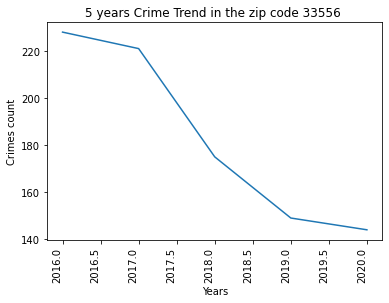

In [18]:
year =[2016,2017,2018,2019,2020]
crimes_count =[228,221,175,149,144]

plt.plot(year,crimes_count)
plt.title('5 years Crime Trend in the zip code 33556 ')
plt.xlabel('Years')
plt.ylabel('Crimes count')
plt.xticks(rotation=90,  horizontalalignment='right', fontweight='light', fontsize='medium',)
plt.yticks(horizontalalignment='right')
plt.show()

In [19]:
#export data to a csv file
data_crime_no_traffic_df_33556.to_csv("../Resources/cd_33556.csv")